<a href="https://colab.research.google.com/github/kimheehyun/ca.housing_PCA/blob/main/hw_5_1_(_%EC%8A%A4%ED%84%B0%EB%94%94_%EB%B2%84%EC%A0%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kneed

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# pcA
from sklearn.decomposition import PCA


#elbow 찾기
from kneed import KneeLocator

In [5]:
data = fetch_california_housing()
df = pd.DataFrame(data["data"],columns=data["feature_names"])
df["MedHouseVal"]=data.target


In [6]:
X=df.drop(columns=["MedHouseVal"])
y=df["MedHouseVal"]


#표준화 작업.
# 평균 0 표.편 1로 만듦 => 값이 0~1이 아님.
scaled_data=StandardScaler().fit_transform(X)

In [7]:
# df

In [8]:
#PCA 적용.
pca=PCA(n_components=2)
pca_data=pca.fit_transform(scaled_data)

In [9]:
pca_df=pd.DataFrame(data=pca_data,columns=["pc1","pc2"])
pca_df['Target']=y

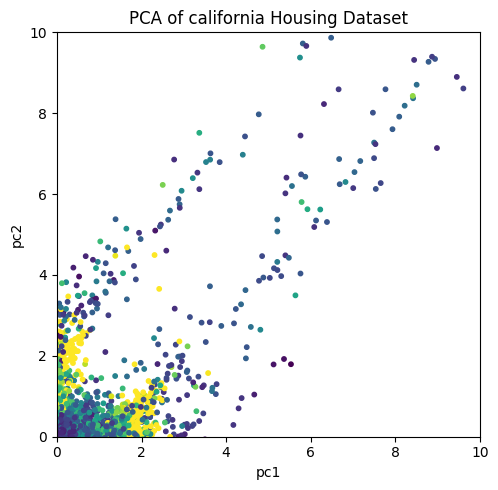

In [10]:
#그림.

fig=plt.figure(figsize=(5,5))
scatter=plt.scatter(pca_df["pc1"],pca_df["pc2"],c=pca_df["Target"],cmap='viridis',s=10)
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("PCA of california Housing Dataset")
plt.tight_layout()

#  여기서 확대 범위 지정
plt.xlim(0, 10)
plt.ylim(0, 10)

#plt.savefig("pca_result.png")
plt.show()

In [11]:
explained = pca.explained_variance_ratio_
print(f'Explained variance by PC1 and PC2: {explained}')

Explained variance by PC1 and PC2: [0.25336868 0.23516245]


pca.explained_variance_ratio 는 보존 비율을 의미함. 쉽게 말해 8차원 데이터를 2차원으로 줄였는데 원래 데이터의 약 49%(25+23) 정도의 정보를 보존한 것임.

📌 Elbow 위치 (추천 주성분 개수): None


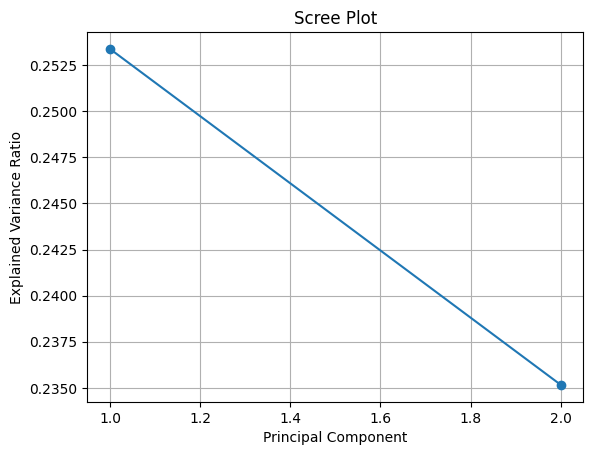

In [18]:

# 4. Elbow (꺾이는 지점) 찾기
knee = KneeLocator(
    x=range(1, len(explained) + 1),
    y=explained,
    curve='convex',
    direction='decreasing'
)

print(" Elbow 위치 (추천 주성분 개수):", knee.knee)

plt.plot(range(1, len(explained) + 1), explained, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

